## Importing packages

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import os
import matplotlib.pyplot as plt

## Loading the dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Reshaping the data

In [3]:
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
print(np.unique(y_train, return_counts=True))

(array([0., 1.], dtype=float32), array([540000,  60000], dtype=int64))


## Building the model

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [7]:
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# fit model
scores, histories = list(), list()
for i in range(1,6):
    history = model.fit(X_train, y_train, epochs=i, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    _, acc = model.evaluate(X_test, y_test, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    histories.append(history)
print(history.history)    

> 97.670
> 98.520
> 98.730
> 98.740
> 98.830
{'loss': [0.001797892851755023, 0.0010793183464556932, 0.0008720281766727567, 0.0006574011640623212, 0.0005016270442865789], 'accuracy': [0.999833345413208, 0.9999333620071411, 0.999916672706604, 0.9999833106994629, 1.0], 'val_loss': [0.039819709956645966, 0.04051658511161804, 0.04275047406554222, 0.04113748297095299, 0.043169017881155014], 'val_accuracy': [0.9873999953269958, 0.9883000254631042, 0.9883000254631042, 0.988099992275238, 0.9883000254631042]}


In [9]:
# saving the model
save_dir = "../results/"
model_name = 'base-model-2.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ../results/base-model-2.h5 


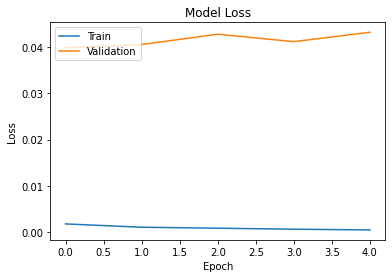

In [10]:
# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

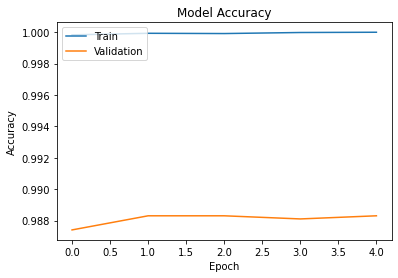

In [11]:
# plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Increasing model depth

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [13]:
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# fit model
scores, histories = list(), list()
for i in range(1,6):
    history = model.fit(X_train, y_train, epochs=i, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    _, acc = model.evaluate(X_test, y_test, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # stores scores
    scores.append(acc)
    histories.append(history)
print(history.history)

> 98.950
> 99.040
> 99.020
> 99.020
> 99.280
{'loss': [0.002132713096216321, 0.0009969680104404688, 0.0007193031487986445, 0.00014030453166924417, 5.846083149663173e-05], 'accuracy': [0.9993666410446167, 0.9997666478157043, 0.9997833371162415, 1.0, 1.0], 'val_loss': [0.03444093093276024, 0.03493102267384529, 0.03307288885116577, 0.03467312455177307, 0.03548099473118782], 'val_accuracy': [0.9929999709129333, 0.9927999973297119, 0.9927999973297119, 0.9930999875068665, 0.9927999973297119]}


In [16]:
# saving the model
save_dir = "../results/"
model_name = 'base-model-2.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at ../results/base-model-2.h5 


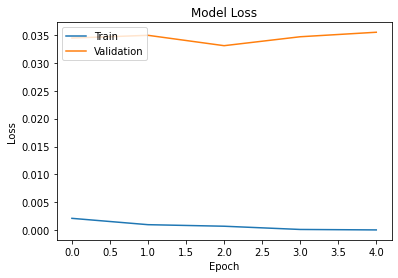

In [17]:
# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

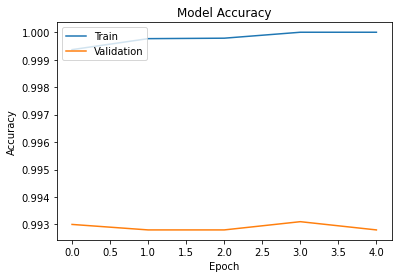

In [18]:
# plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
# make a prediction for a new image.
import keras
from numpy import argmax
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img
 
# load an image and predict the class
def run_example():
    # load the image
    img = load_image('sample_image.png')
    # load model
    model = load_model('../results/base-model-2.h5')
    # predict the class
    predict_value = model.predict(img)
    digit = argmax(predict_value)
    print(digit)
 
# entry point, run the example
run_example()

1/1 [==============================] - ETA: 0s

C:\Users\Rashmi Dsouza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
7


313/313 [==============================] - 1s 4ms/step
10000
9928  classified correctly
72  classified incorrectly


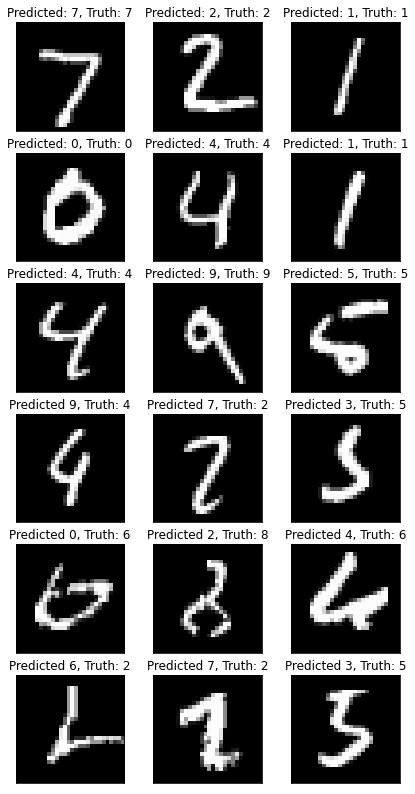

In [49]:
# load the model and create predictions on the test set
mnist_model = load_model("../results/base-model-2.h5")
predicted_probs = mnist_model.predict(X_test)
predicted_classes = np.argmax(predicted_probs, axis=1)
# predicted_classes = to_categorical(predicted_classes)
print(len(predicted_classes))
# see which we predicted correctly and which not
true_classes = np.argmax(y_test, axis=1)
correct_indices = np.nonzero(predicted_classes == true_classes)[0]
incorrect_indices = np.nonzero(predicted_classes != true_classes)[0]

print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}, Truth: {}".format(predicted_classes[correct], true_classes[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Truth: {}".format(predicted_classes[incorrect],true_classes[incorrect]))
    plt.xticks([])
    plt.yticks([])